### Notebook for running SCOT on SNARE-seq Cell Mixture Data
Access to dataset:  
SNARE-seq data in `/data` folder containes the version with dimensionality reduction techniques applied from the original SNARE-sew paper ()  
SCOT software has been updated on 20 September 2020. It now outputs error statements for convergence issues. If you run into such an error, please try using a larger epsilon value for the entropic regularization.  
If you have any questions, e-mail: ritambhara@brown.edu, pinar_demetci@brown.edu, rebecca_santorella@brown.edu  

##### Import source code:

In [1]:
import src.utils as ut
import src.evals as evals
from src.scot import *

##### Read in the data:

In [2]:
X=np.exp(np.load("data/scrna_feat.npy"))
y=np.load("data/scatac_feat.npy")
print("Dimensions of input datasets are: ", "X= ", X.shape, " y= ", y.shape)

Dimensions of input datasets are:  X=  (1047, 10)  y=  (1047, 19)


##### Perform normalization (optional):

In [3]:
X=ut.unit_normalize(X)
y=ut.unit_normalize(y)

## If you'd like to apply z-score normalization instead:
# X=ut.zscore_standardize()
# y=ut.zscore_standardize()

##### Set hyperparameters of the algorithm:

In [4]:
# Set hyperparameters of the algorithm:
k=24
e=0.0038 
# Other values to try for very similar alignment results:
# k=25 with e=0.0018, 0.00181, 0.00185, 0.002, or k=30 with 
# Combinations from a range of k=20 to k=30 and e= seems to yield the best results on this dataset

X_new,y_new= scot(X, y, k, e)

It.  |Err         
-------------------
    0|1.425627e-03|
   10|1.977665e-04|
   20|7.060937e-05|
   30|8.834972e-06|
   40|7.413147e-07|
   50|6.468501e-08|
   60|5.819180e-09|
   70|5.293865e-10|


In [5]:
fracs=evals.calc_domainAveraged_FOSCTTM(X_new, y_new)
print("Average FOSCTTM score for this alignment is: ", np.mean(fracs))

Average FOSCTTM score for this alignment is:  0.19851720567368114


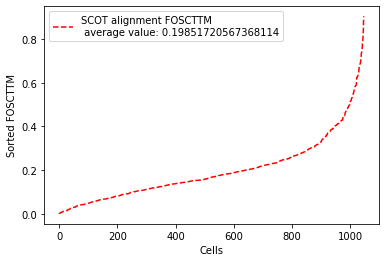

In [6]:
import matplotlib.pyplot as plt
legend_label="SCOT alignment FOSCTTM \n average value: "+str(np.mean(fracs))
plt.plot(np.arange(len(fracs)), np.sort(fracs), "r--", label=legend_label)
plt.legend()
plt.xlabel("Cells")
plt.ylabel("Sorted FOSCTTM")
plt.show()